In [10]:
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tipo de dados carregados: <class 'dict'>
Chaves principais do dicionário: dict_keys(['images', 'annotations', 'categories', 'info'])
Total de anotações: 6117
Primeira anotação: {'image_id': 1, 'bbox': [123, 115, 379, 275], 'keypoints': [[193, 216, 1], [160, 217, 1], [174, 261, 1], [204, 186, 1], [152, 182, 1], [0, 0, 0], [0, 0, 0], [273, 168, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [266, 225, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [190, 145, 1], [351, 238, 1]], 'num_keypoints': 20, 'category_id': 1}
Chaves de uma anotação: dict_keys(['image_id', 'bbox', 'keypoints', 'num_keypoints', 'category_id'])
Categorias disponíveis: [{'supercategory': 'animal', 'id': 1, 'name': 'dog', 'keypoints': ['left_eye', 'right_eye', 'nose', 'left_ear', 'right_ear', 'left_front_elbow', 'right_front_elbow', 'left_back_elbow', 'right_back_elbow', 'left_front_knee', 'right_front_knee', 'left_back_knee', 'right_back_knee', 'left_front_paw', 'right_front_paw', 'left_back_paw', 'right_

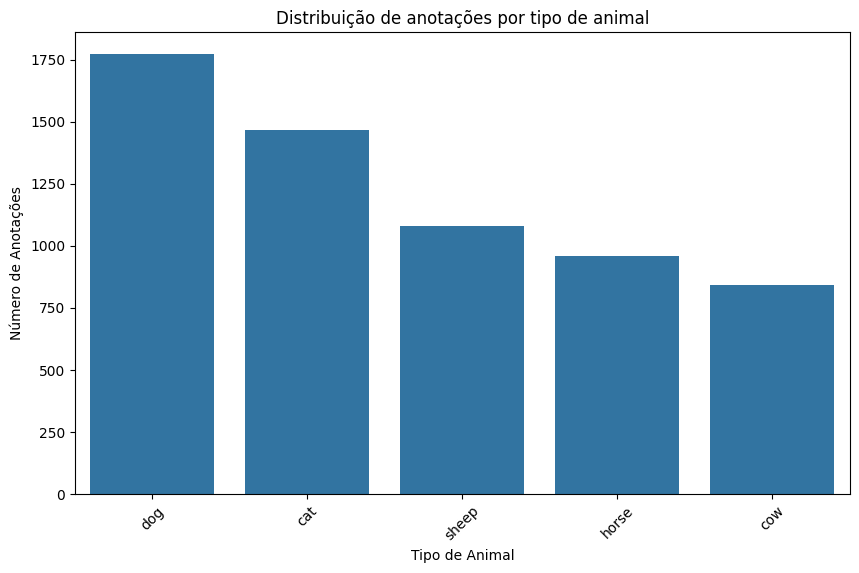

In [11]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o caminho para o dataset e o arquivo keypoints.json
dataset_path = '/content/drive/MyDrive/archive/images/images'
keypoints_path = os.path.join(dataset_path, 'keypoints.json')

# Carregar o arquivo keypoints.json
with open(keypoints_path) as f:
    keypoints_data = json.load(f)

# Verificar a estrutura do JSON
print(f"Tipo de dados carregados: {type(keypoints_data)}")

# Exibir as chaves principais do dicionário
print(f"Chaves principais do dicionário: {keypoints_data.keys()}")

# Verificar o conteúdo da chave 'annotations'
annotations = keypoints_data['annotations']
print(f"Total de anotações: {len(annotations)}")
print(f"Primeira anotação: {annotations[0]}")
print(f"Chaves de uma anotação: {annotations[0].keys()}")

# Explorar as categorias para identificar o ID associado a bovinos
categories = keypoints_data['categories']
print(f"Categorias disponíveis: {categories}")

# Exibir o ID e nome de cada categoria
for category in categories:
    print(f"ID: {category['id']}, Nome: {category['name']}")

# Ajustando o ID da categoria de bovinos após verificar nas categorias

bovine_category_id = 5  # ID correto para bovinos (cows)

# Filtrar anotações apenas para bovinos
bovine_data = [annotation for annotation in annotations if annotation['category_id'] == bovine_category_id]
print(f"Total de anotações de bovinos: {len(bovine_data)}")

# Gráfico de distribuição de tipos de animais (considerando múltiplas categorias)
# Primeiro, contar o número de anotações por categoria
category_counts = {category['name']: 0 for category in categories}
for annotation in annotations:
    category_id = annotation['category_id']
    category_name = next(category['name'] for category in categories if category['id'] == category_id)
    category_counts[category_name] += 1

# Preparar os dados para o gráfico
category_names = list(category_counts.keys())
category_values = list(category_counts.values())

# Exibir gráfico de distribuição
plt.figure(figsize=(10, 6))
sns.barplot(x=category_names, y=category_values)
plt.title('Distribuição de anotações por tipo de animal')
plt.xticks(rotation=45)
plt.xlabel('Tipo de Animal')
plt.ylabel('Número de Anotações')
plt.show()



Processando a imagem: /content/drive/MyDrive/archive/images/images/2007_000464.jpg
Imagem Original:


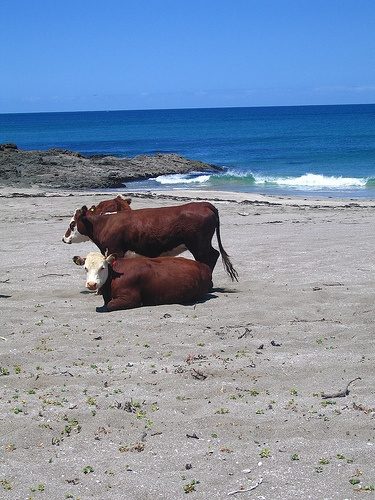

Imagem Processada (Escala de Cinza):


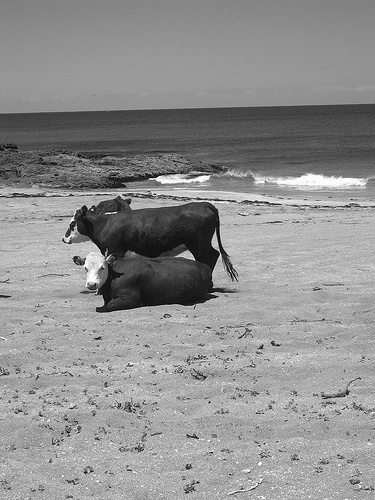

In [12]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Função para carregar e processar imagens de bovinos
def load_and_process_image(image_path):
    # Verificar se o caminho da imagem é válido
    if not os.path.exists(image_path):
        print(f"Erro: O caminho da imagem {image_path} não existe.")
        return None, None

    # Carregar a imagem
    image = cv2.imread(image_path)

    # Verificar se a imagem foi carregada corretamente
    if image is None:
        print(f"Erro: Não foi possível carregar a imagem {image_path}.")
        return None, None

    # Converter para escala de cinza (opcional dependendo do modelo de estimativa de pose)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image


image_id = bovine_data[0]['image_id']  # Usando a primeira imagem de bovinos
image_filename = keypoints_data['images'][str(image_id)]  # Nome do arquivo da imagem
image_path = os.path.join(dataset_path, image_filename)

# Exibir o caminho da imagem para depuração
print(f"Processando a imagem: {image_path}")

# Carregar e processar a imagem
original_image, processed_image = load_and_process_image(image_path)

if original_image is not None and processed_image is not None:
    # Exibir a imagem original e processada
    print("Imagem Original:")
    cv2_imshow(original_image)

    print("Imagem Processada (Escala de Cinza):")
    cv2_imshow(processed_image)
else:
    print("Não foi possível processar a imagem.")


Processando imagem 1/842: 2007_000464.jpg
Imagem Original:


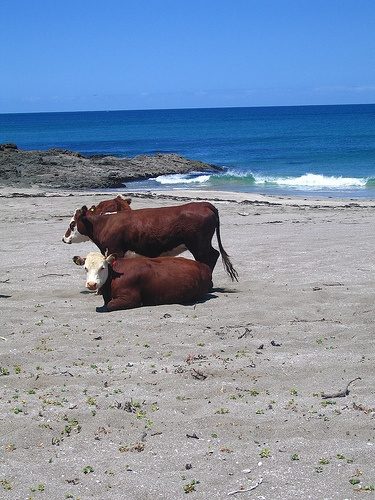

Imagem Processada (Escala de Cinza):


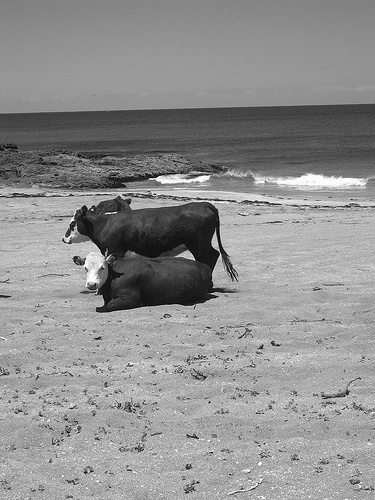

In [13]:
import numpy as np

# Função para exibir passo-a-passo detalhado do processamento de imagem
def process_bovine_images(image_ids):
    for i, image_id in enumerate(image_ids):
        image_filename = keypoints_data['images'][str(image_id)]  # Nome do arquivo da imagem
        image_path = os.path.join(dataset_path, image_filename)

        # Carregar e processar a imagem
        original_image, processed_image = load_and_process_image(image_path)

        if original_image is not None and processed_image is not None:
            # Exibir o processo passo a passo
            print(f"Processando imagem {i+1}/{len(image_ids)}: {image_filename}")
            print("Imagem Original:")
            cv2_imshow(original_image)

            print("Imagem Processada (Escala de Cinza):")
            cv2_imshow(processed_image)
        else:
            print(f"Erro ao processar a imagem {image_filename}")

        # Exibir apenas um exemplo detalhado
        if i == 0:
            break  # Exibir apenas o primeiro para fins de exemplo detalhado

# Processar um exemplo de imagem de bovinos
bovine_image_ids = [annotation['image_id'] for annotation in bovine_data]
process_bovine_images(bovine_image_ids)


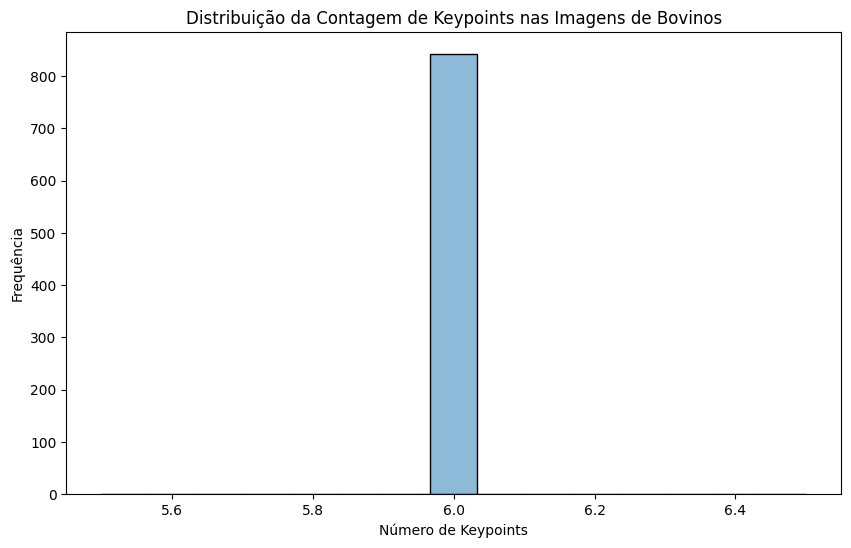

Estatísticas descritivas da contagem de keypoints:
       Número de Keypoints
count                842.0
mean                   6.0
std                    0.0
min                    6.0
25%                    6.0
50%                    6.0
75%                    6.0
max                    6.0


In [9]:
# Contar o número de keypoints por imagem de bovinos
bovine_keypoints_count = [len(annotation['keypoints']) // 3 for annotation in bovine_data]

# Gerar um histograma da contagem de keypoints
plt.figure(figsize=(10, 6))
sns.histplot(bovine_keypoints_count, bins=15, kde=True)
plt.title('Distribuição da Contagem de Keypoints nas Imagens de Bovinos')
plt.xlabel('Número de Keypoints')
plt.ylabel('Frequência')
plt.show()

# Calcular estatísticas descritivas
import pandas as pd

keypoints_df = pd.DataFrame(bovine_keypoints_count, columns=['Número de Keypoints'])
stats = keypoints_df.describe()
print("Estatísticas descritivas da contagem de keypoints:")
print(stats)
